# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb


## Loading  Mtree 

In [3]:
with open ('Mtree.pickle', 'rb') as file:
    Mtree = pickle.load(file)

 #  Best Models for Sand, Silt, Clay, TOC, and CaCO3..

In [4]:
feature_scores = {}

model_details ={}

##  Sand 

Sand -> [ iqrp - **3.05**, r2 - **0.69**, Spec - none, n_bands - 50, Tar - none] :   **cubist**   <br/><br/>
***Description***: We get the best model for sand when we use cubist method. \
While training the model we utilize the smoothed spectra resampled to 50 bands and
sand values are used without any preprocessing.


Sand -> [ iqrp - **3.05**, r2 - **0.69**, Spec - fod, n_bands - 24, Tar - minmax] :   **gbrt**   <br/><br/>
***Description***: We get the best model for sand when we use gbrt method. \
While training the model we utilize the smoothed fod spectra resampled to 24 bands and
sand values are used with minmax normalization.

In [5]:
sand_model_cubist = Cubist(n_rules = 50, n_committees = 5, random_state = 42) 
sand_model_cubist.fit(sampled_spec[50], T[0])

Cubist(n_committees=5, n_rules=50, random_state=42)

In [6]:
sampled_spec[50].head(1)

,471,512,553,594,635,676,717,758,799,840,881,922,963,1004,1045,1086,1127,1168,1209,1250,1291,1332,1373,1414,1455,1496,1537,1578,1619,1660,1701,1742,1783,1824,1865,1906,1947,1988,2029,2070,2111,2152,2193,2234,2275,2316,2357,2398,2439,2480
0,0.065518,0.080202,0.113403,0.165125,0.198475,0.2264,0.25675,0.282425,0.29905,0.30945,0.3189,0.3309,0.345,0.360275,0.3753,0.390125,0.402675,0.413175,0.421875,0.4292,0.4341,0.436675,0.431225,0.399075,0.413375,0.42825,0.440925,0.44875,0.454,0.45855,0.46225,0.463,0.465925,0.46915,0.45905,0.35295,0.355775,0.3959,0.432425,0.45385,0.467725,0.462925,0.43035,0.4346,0.43735,0.4252,0.4079,0.38775,0.359375,0.330325


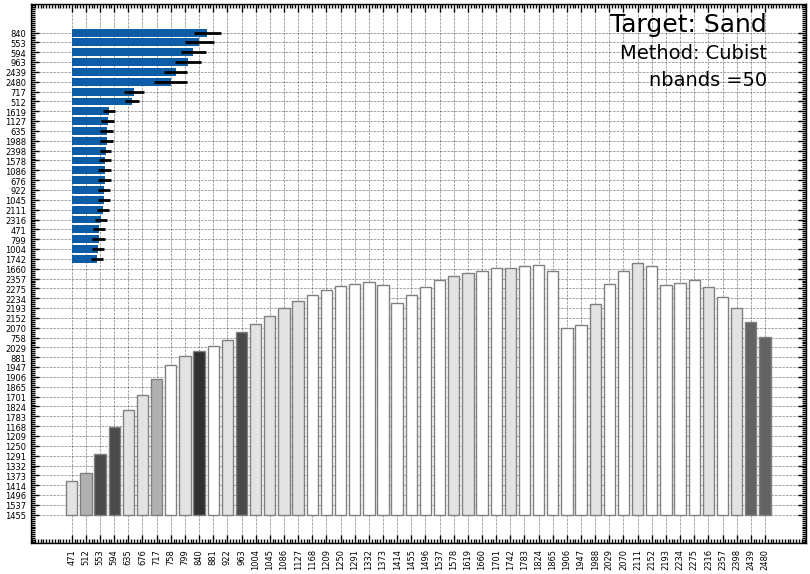

In [7]:
feature_scores['Sand'] = permutation_importance(sand_model_cubist, sampled_spec[50], T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'Cubist', 'spec': sampled_spec[50], 'spec_proc': 'spectra', 'n_bands': 50}
show_important_features_for ('Sand', model_details, feature_scores, 10, 50, 1)

In [8]:
# Sand -> [ iqrp - 3.05, r2 - 0.69, Spec - fod, n_bands - 24, Tar - minmax] : gbrt

sand_model_gbrt = GradientBoostingRegressor()  
sand_model_gbrt.fit(sampled_fod[24], T[0])

NameError: name 'sampled_fod' is not defined

In [ ]:
sampled_fod[24].head(1)

In [ ]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, sampled_fod[24], T[0], n_repeats=20, random_state=0)

model_details['Sand'] = {'method': 'gbrt', 'spec': sampled_fod[24], 'spec_proc': 'fod', 'n_bands': 24}

In [ ]:
show_important_features_for ('Sand', model_details, feature_scores, 10, 9000, 1)

###  Silt 

In [ ]:
# For:Silt-> ['r2', 0.5, 'Spec:', 'fod2', 'bands:', 12, 'Tar:', 'none'] :randomforest

Silt -> [ iqrp - **2.04**, r2 - **0.5**, Spec - fod2, n_bands - 12, Tar - none] :   **random**  <br/><br/>
***Description***: We get the best model for silt when we use randomforest method. \
While training the model we utilize the first order derivative (of the smoothed spectra which is resampled to 12 bands) and
silt values are used without any preprocessing.

In [ ]:
silt_model_rand = RandomForestRegressor(random_state= 23)
silt_model_rand.fit(fod_sampled[12], T[1])

In [ ]:
fod_sampled[12].head(1)

In [ ]:
feature_scores['Silt'] = permutation_importance(silt_model_rand, fod_sampled[12], T[1], n_repeats=20, random_state=0)

In [ ]:
model_details['Silt'] = {'method': 'rand', 'spec': fod_sampled[12], 'spec_proc': 'fod2', 'n_bands': 12}

show_important_features_for ('Silt', model_details, feature_scores, 5, 10, 5)

##  Clay

Clay -> [ iqrp - **2.99**, r2 - **0.77**, Spec - log, n_bands - 15, Tar - minmax] :   **mult**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the inverse logarithmic reflectance (1/logR) of the smoothed spectra which is resampled to 15 bands and clay values are used by  normalizing it in the range of 0-10.

Clay -> [ iqrp - **2.97**, r2 - **0.77**, Spec - continuum, n_bands - 30, Tar - minmax] :   **gbrt**   <br/><br/>
***Description***: We get the best model for clay when we use mult (multiple linear regression) method. \
While training the model we utilize the continum removed smoothed spectra which is resampled to 30 bands and clay values are used by  normalizing it in the range of 0-10.

In [ ]:
clay_model_mult = linear_model.LinearRegression()
clay_model_mult.fit(sampled_log[15], NT[2])

In [ ]:
sampled_log[15].head(1)

In [ ]:
feature_scores['Clay'] = permutation_importance(clay_model_mult, sampled_log[15], NT[2], n_repeats=20, random_state=0)

model_details['Clay'] = {'method': 'mult', 'spec': sampled_log[15], 'spec_proc': 'log', 'n_bands': 15}

In [ ]:
show_important_features_for ('Clay', model_details, feature_scores, 0.001, 1, 2)

In [ ]:
# For:Clay-> ['r2', 0.77, 'Spec:', 'continuum', 'bands:', 30, 'Tar:', 'minmax'] :gbrt
clay_model_gbrt = GradientBoostingRegressor()
clay_model_gbrt.fit(sampled_cr[30], NT[2])

In [ ]:
sampled_cr[30].head(1)

In [ ]:
feature_scores['Clay'] = permutation_importance(clay_model_gbrt, sampled_cr[30], NT[2], n_repeats=20, random_state=0)

model_details['Clay'] = {'method': 'gbrt', 'spec': sampled_cr[30], 'spec_proc': 'continuum', 'n_bands': 30}

In [ ]:
show_important_features_for ('Clay', model_details, feature_scores, 20, 150, 2)

##  TOC 

In [ ]:
# For:TOC-> ['iqrp', 2.51, 'Spec:', 'fod2', 'bands:', 40, 'Tar:', 'minmax'] :gbrt
# For:TOC-> ['r2', 0.81, 'Spec:', 'fod2', 'bands:', 40, 'Tar:', 'minmax'] :gbrt

TOC -> [ iqrp - **2.51**, r2 - **0.81**, Spec - fod2, n_bands - 40, Tar - minmax] :   **gbrt**  <br/><br/>
***Description***: We get the best model for TOC when we use gbrt (gradient boosted regression tree) method. \
While training the model we utilize the fod (of the smoothed spectra which is resampled to 55 bands) and
TOC values are used by  normalizing it in the range of 0-10.

In [ ]:
TOC_model_gbrt = GradientBoostingRegressor() 
TOC_model_gbrt.fit(fod_sampled[40], NT[3])

In [ ]:
fod_sampled[40].head(1)

In [ ]:
feature_scores['TOC'] = permutation_importance(TOC_model_gbrt, fod_sampled[40], NT[3], n_repeats=20, random_state=0)

model_details['TOC'] = {'method': 'gbrt', 'spec': fod_sampled[40], 'spec_proc': 'fod2', 'n_bands': 40}

In [ ]:
show_important_features_for ('TOC', model_details, feature_scores, 50, 70, 55)

##  CaCO3 

In [ ]:
#For:CaCO3-> ['iqrp', 2.32, 'Spec:', 'none', 'bands:', 3, 'Tar:', 'none'] :gbrt
#For:CaCO3-> ['r2', 0.6, 'Spec:', 'none', 'bands:', 3, 'Tar:', 'none'] :gbrt

CaCO3 -> [ iqrp - **2.32**, r2 - **0.6**, Spec - none, n_bands - 3, Tar - none] :   **gbrt**  <br/><br/>
***Description***: We get the best model for CaCO3 when we use gbrt (gradient boosted regression tree ) method. \
While training the model we utilize the smoothed spectra which is resampled to 3 bands and
CaCO3 values are used without any preprocessing.

In [ ]:
CaCO3_model_gbrt = GradientBoostingRegressor()
CaCO3_model_gbrt.fit(sampled_spec[3], T[4])

In [ ]:
sampled_spec[3].head(1)

In [ ]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_gbrt, sampled_spec[3], T[4], n_repeats=20, random_state=0)

model_details['CaCO3'] = {'method': 'gbrt', 'spec': sampled_spec[3], 'spec_proc': 'spectra', 'n_bands': 3}

In [ ]:
show_important_features_for ('CaCO3', model_details, feature_scores, 0.02, 0.5, 3)

In [ ]:
ipywidgets.interact(show_important_features_for, tar = target_names, model_details = [model_details], 
                    feature_scores = [feature_scores], r_factor = (0,100,0.01), X_factor = (0,1000,1), sample = (0,50,1))
                    
